In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales_data = pd.read_csv('sales data-set.csv')
stores_data = pd.read_excel('stores data-set-withDMA.xlsx')

combined_data = pd.merge(sales_data, stores_data, on='Store', how='left')

<ipython-input-6-dde898c08041>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='DMA', y='Weekly_Sales', data=top_15_dmas, palette='Spectral')


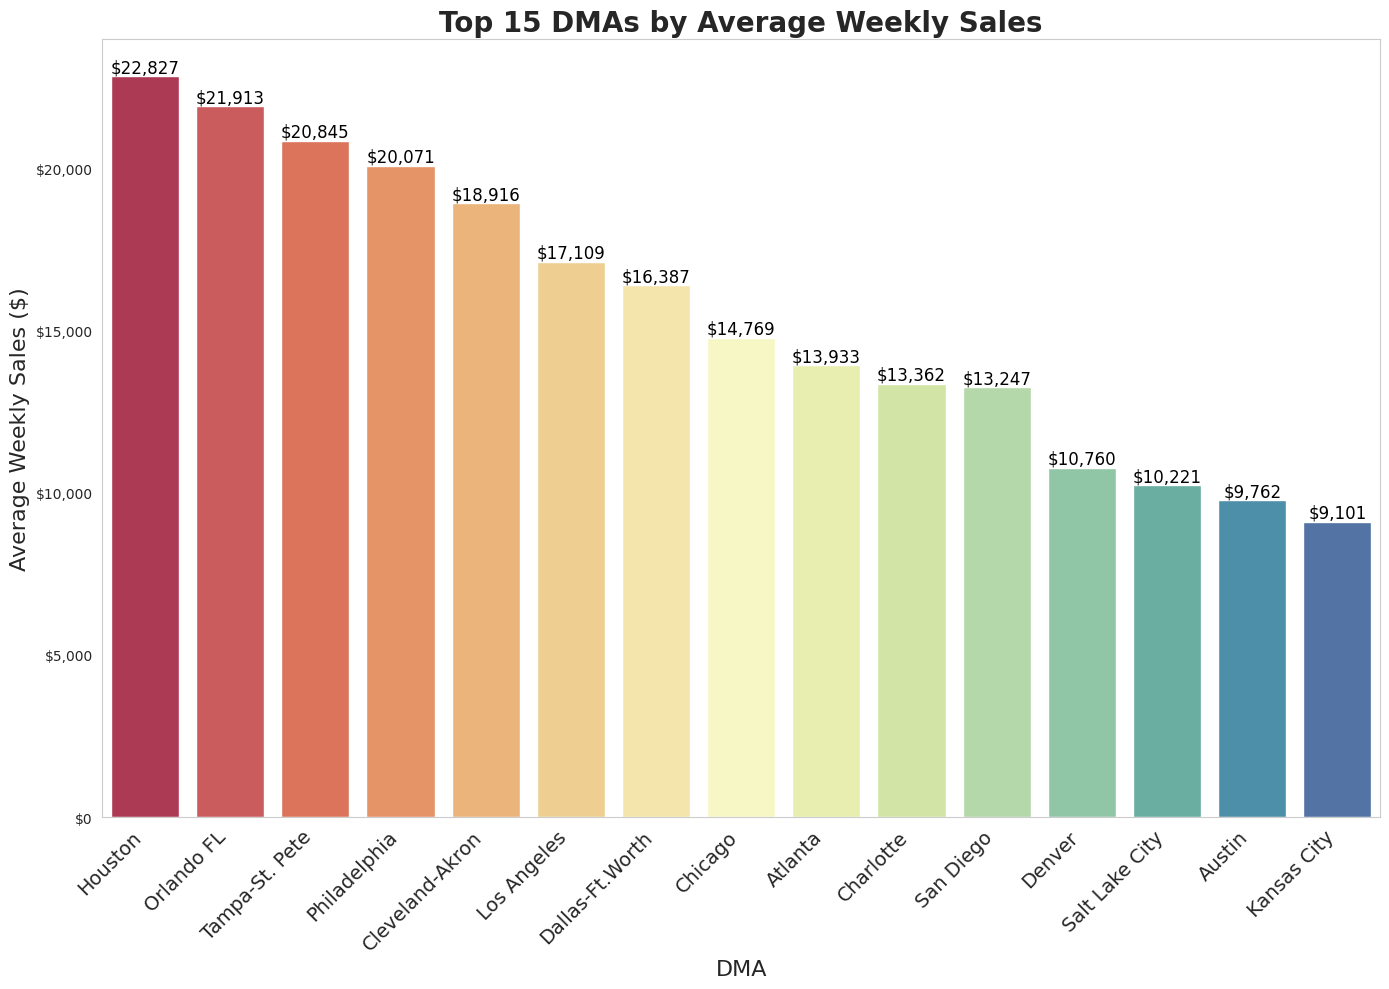

In [6]:
combined_data.to_csv('path_to_save_combined_data.csv', index=False)


combined_data.rename(columns=lambda x: x.strip(), inplace=True)

# Group the data by the 'DMA' column and calculate the average 'Weekly_Sales'
dma_sales_avg = combined_data.groupby('DMA')['Weekly_Sales'].mean().reset_index()

# Sort the DMAs by average 'Weekly_Sales' in descending order
top_dmas = dma_sales_avg.sort_values(by='Weekly_Sales', ascending=False)

# Select the top 15 DMAs
top_15_dmas = top_dmas.head(15)

top_15_dmas['DMA'] = top_15_dmas['DMA'].replace("Oralando-Daytona Brach-Melbourne FL", "Orlando FL")

# Reset the index for a cleaner look
top_15_dmas = top_15_dmas.reset_index(drop=True)

# Add a new column for formatted 'Weekly_Sales' as a whole dollar value
top_15_dmas['Formatted_Weekly_Sales'] = top_15_dmas['Weekly_Sales'].apply(lambda x: f'${x:,.0f}')

# Plotting using the original 'Weekly_Sales' column
sns.set_style('whitegrid')

# Created a vertical bar chart
plt.figure(figsize=(14, 10))
barplot = sns.barplot(x='DMA', y='Weekly_Sales', data=top_15_dmas, palette='Spectral')

# Added title and labels with increased font size and make the title bold
plt.title('Top 15 DMAs by Average Weekly Sales', fontsize=20, fontweight='bold')
plt.xlabel('DMA', fontsize=16)
plt.ylabel('Average Weekly Sales ($)', fontsize=16)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)

# Format y-axis labels as whole number currency
barplot.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: f"${x:,.0f}")
)

# Display the formatted values on the bars with smaller font size
for index, row in top_15_dmas.iterrows():
    bar_height = row['Weekly_Sales']
    plt.text(index, bar_height, row['Formatted_Weekly_Sales'],
             color='black', ha="center", fontsize=12, va='bottom')

plt.grid(False)

plt.tight_layout()  # Adjust layout to fit the rotated x labels
plt.show()



<ipython-input-4-ede193efdbd1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='DMA', y='Size', data=sorted_average_store_size, palette='Spectral')


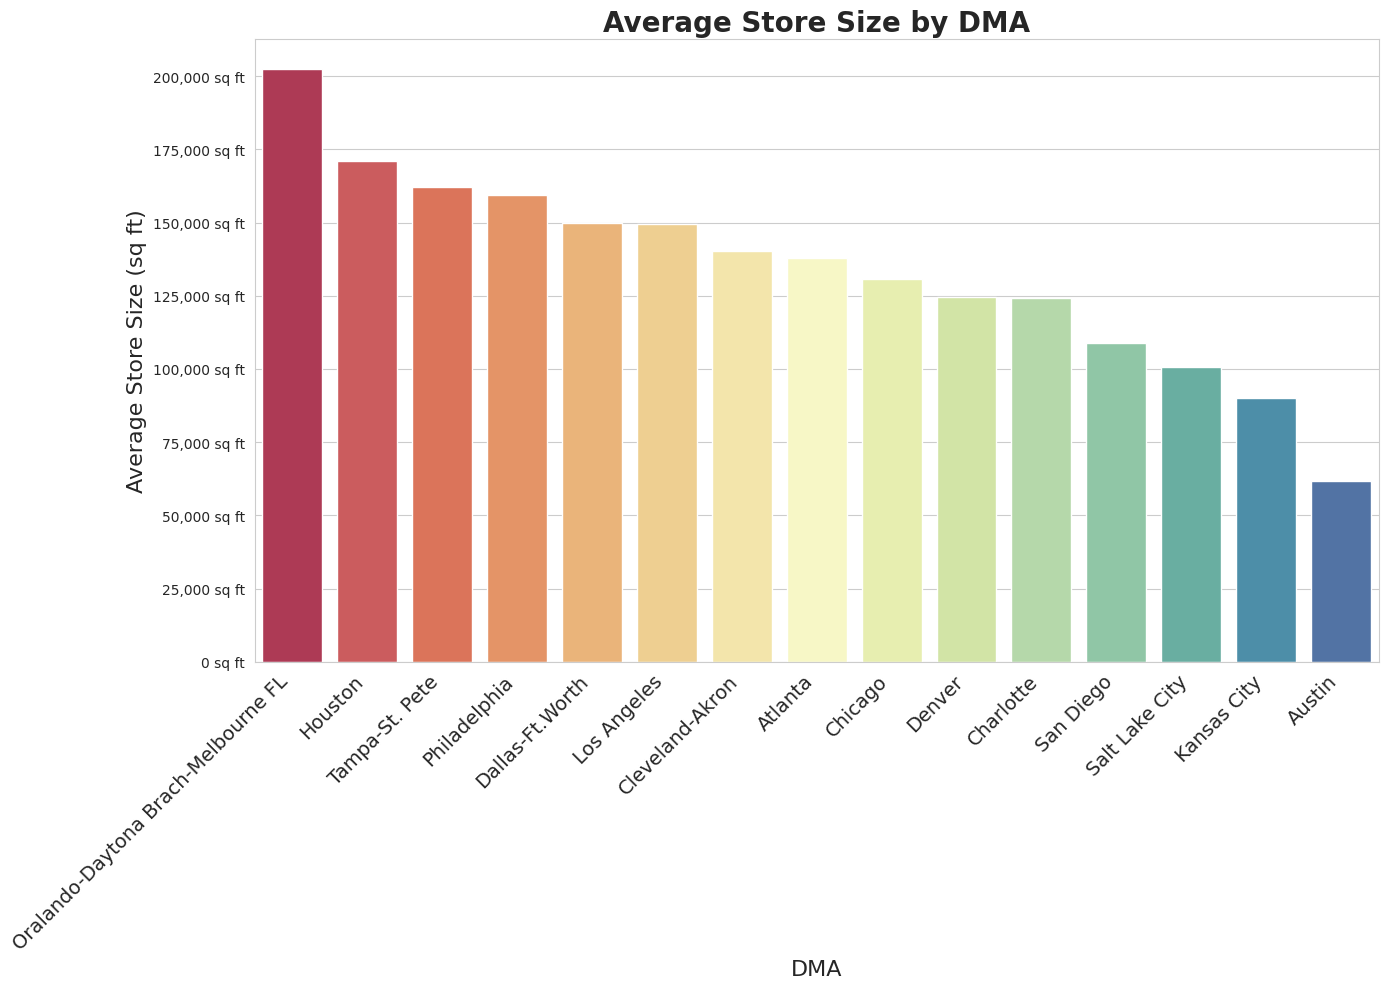

In [4]:

# Calculate the average store size for each DMA
average_store_size = combined_data.groupby('DMA')['Size'].mean().reset_index()

# Sort the DMAs by average store size in descending order
sorted_average_store_size = average_store_size.sort_values('Size', ascending=False)

# Create a vertical bar chart
plt.figure(figsize=(14, 10))
barplot = sns.barplot(x='DMA', y='Size', data=sorted_average_store_size, palette='Spectral')

# Add title and labels with increased font size and bold title
plt.title('Average Store Size by DMA', fontsize=20, fontweight='bold')
plt.xlabel('DMA', fontsize=16)
plt.ylabel('Average Store Size (sq ft)', fontsize=16)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)

# Format y-axis labels as square feet
barplot.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: f"{x:,.0f} sq ft")
)

plt.tight_layout()  # Adjust layout to fit the rotated x labels
plt.show()


<ipython-input-7-5dd12df45a98>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  combined_data['Date'] = pd.to_datetime(combined_data['Date'])


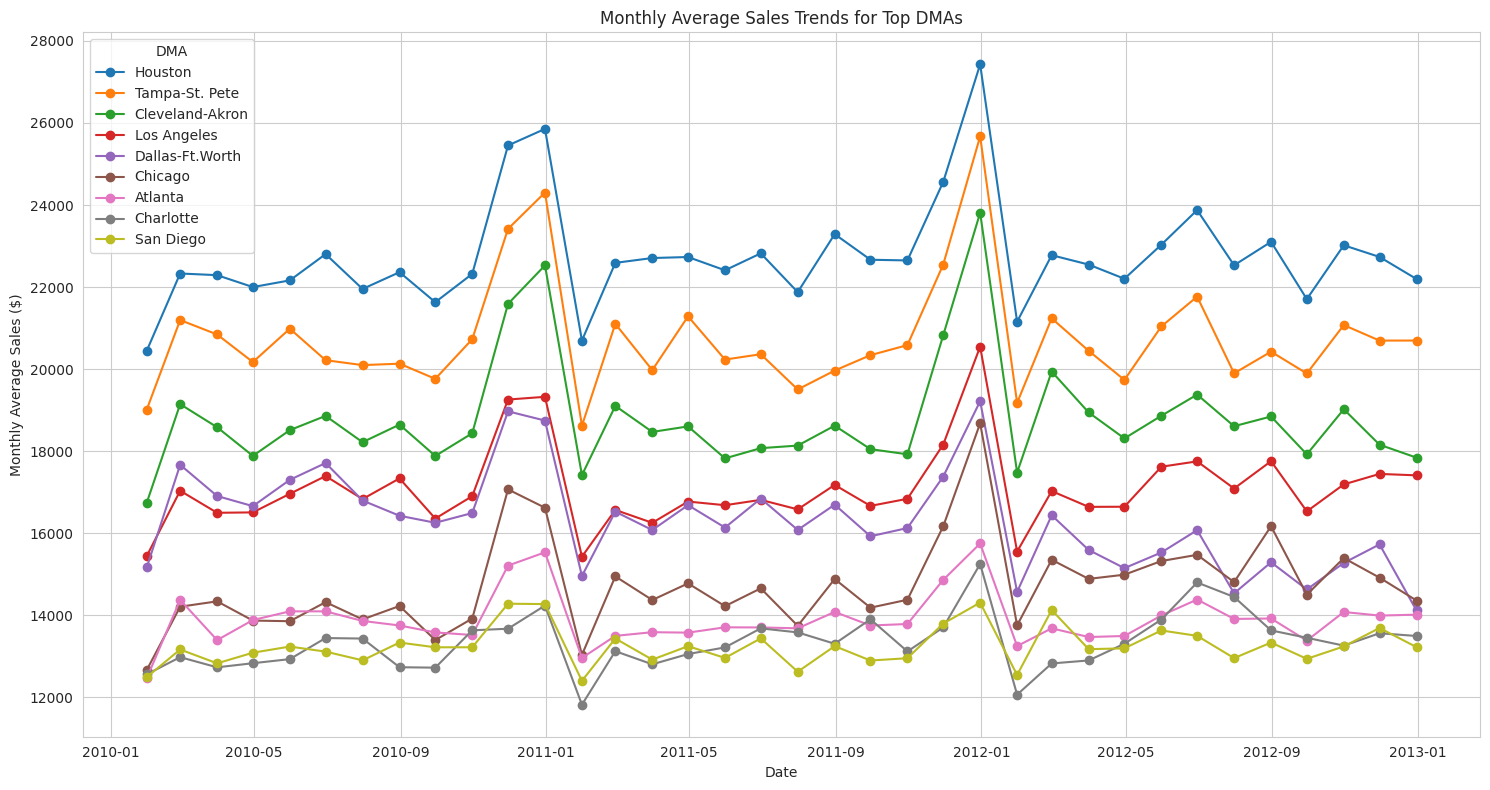

In [7]:

# Convert 'Date' to datetime and 'Weekly_Sales' to numeric, if not already
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data['Weekly_Sales'] = pd.to_numeric(combined_data['Weekly_Sales'], errors='coerce')

# Filter for the top DMAs
top_dmas = [
    'Houston', 'Orlando-Daytona Beach-Melbourne FL', 'Tampa-St. Pete',
    'Cleveland-Akron', 'Los Angeles', 'Dallas-Ft.Worth', 'Chicago',
    'Atlanta', 'Charlotte', 'San Diego'
]
top_dma_data = combined_data[combined_data['DMA'].isin(top_dmas)]

# Group by 'DMA' and 'Date', then calculate the average to get monthly average sales
monthly_average_sales = top_dma_data.groupby(['DMA', pd.Grouper(key='Date', freq='M')])['Weekly_Sales'].mean().reset_index()

# Pivot for plotting
monthly_average_sales_pivot = monthly_average_sales.pivot(index='Date', columns='DMA', values='Weekly_Sales')

# Plot each DMA's average sales trend
plt.figure(figsize=(15, 8))
for dma in top_dmas:
    if dma in monthly_average_sales_pivot.columns:
        plt.plot(monthly_average_sales_pivot.index, monthly_average_sales_pivot[dma], marker='o', label=dma)

plt.title('Monthly Average Sales Trends for Top DMAs')
plt.xlabel('Date')
plt.ylabel('Monthly Average Sales ($)')
plt.legend(title='DMA')
plt.grid(True)
plt.tight_layout()
plt.show()



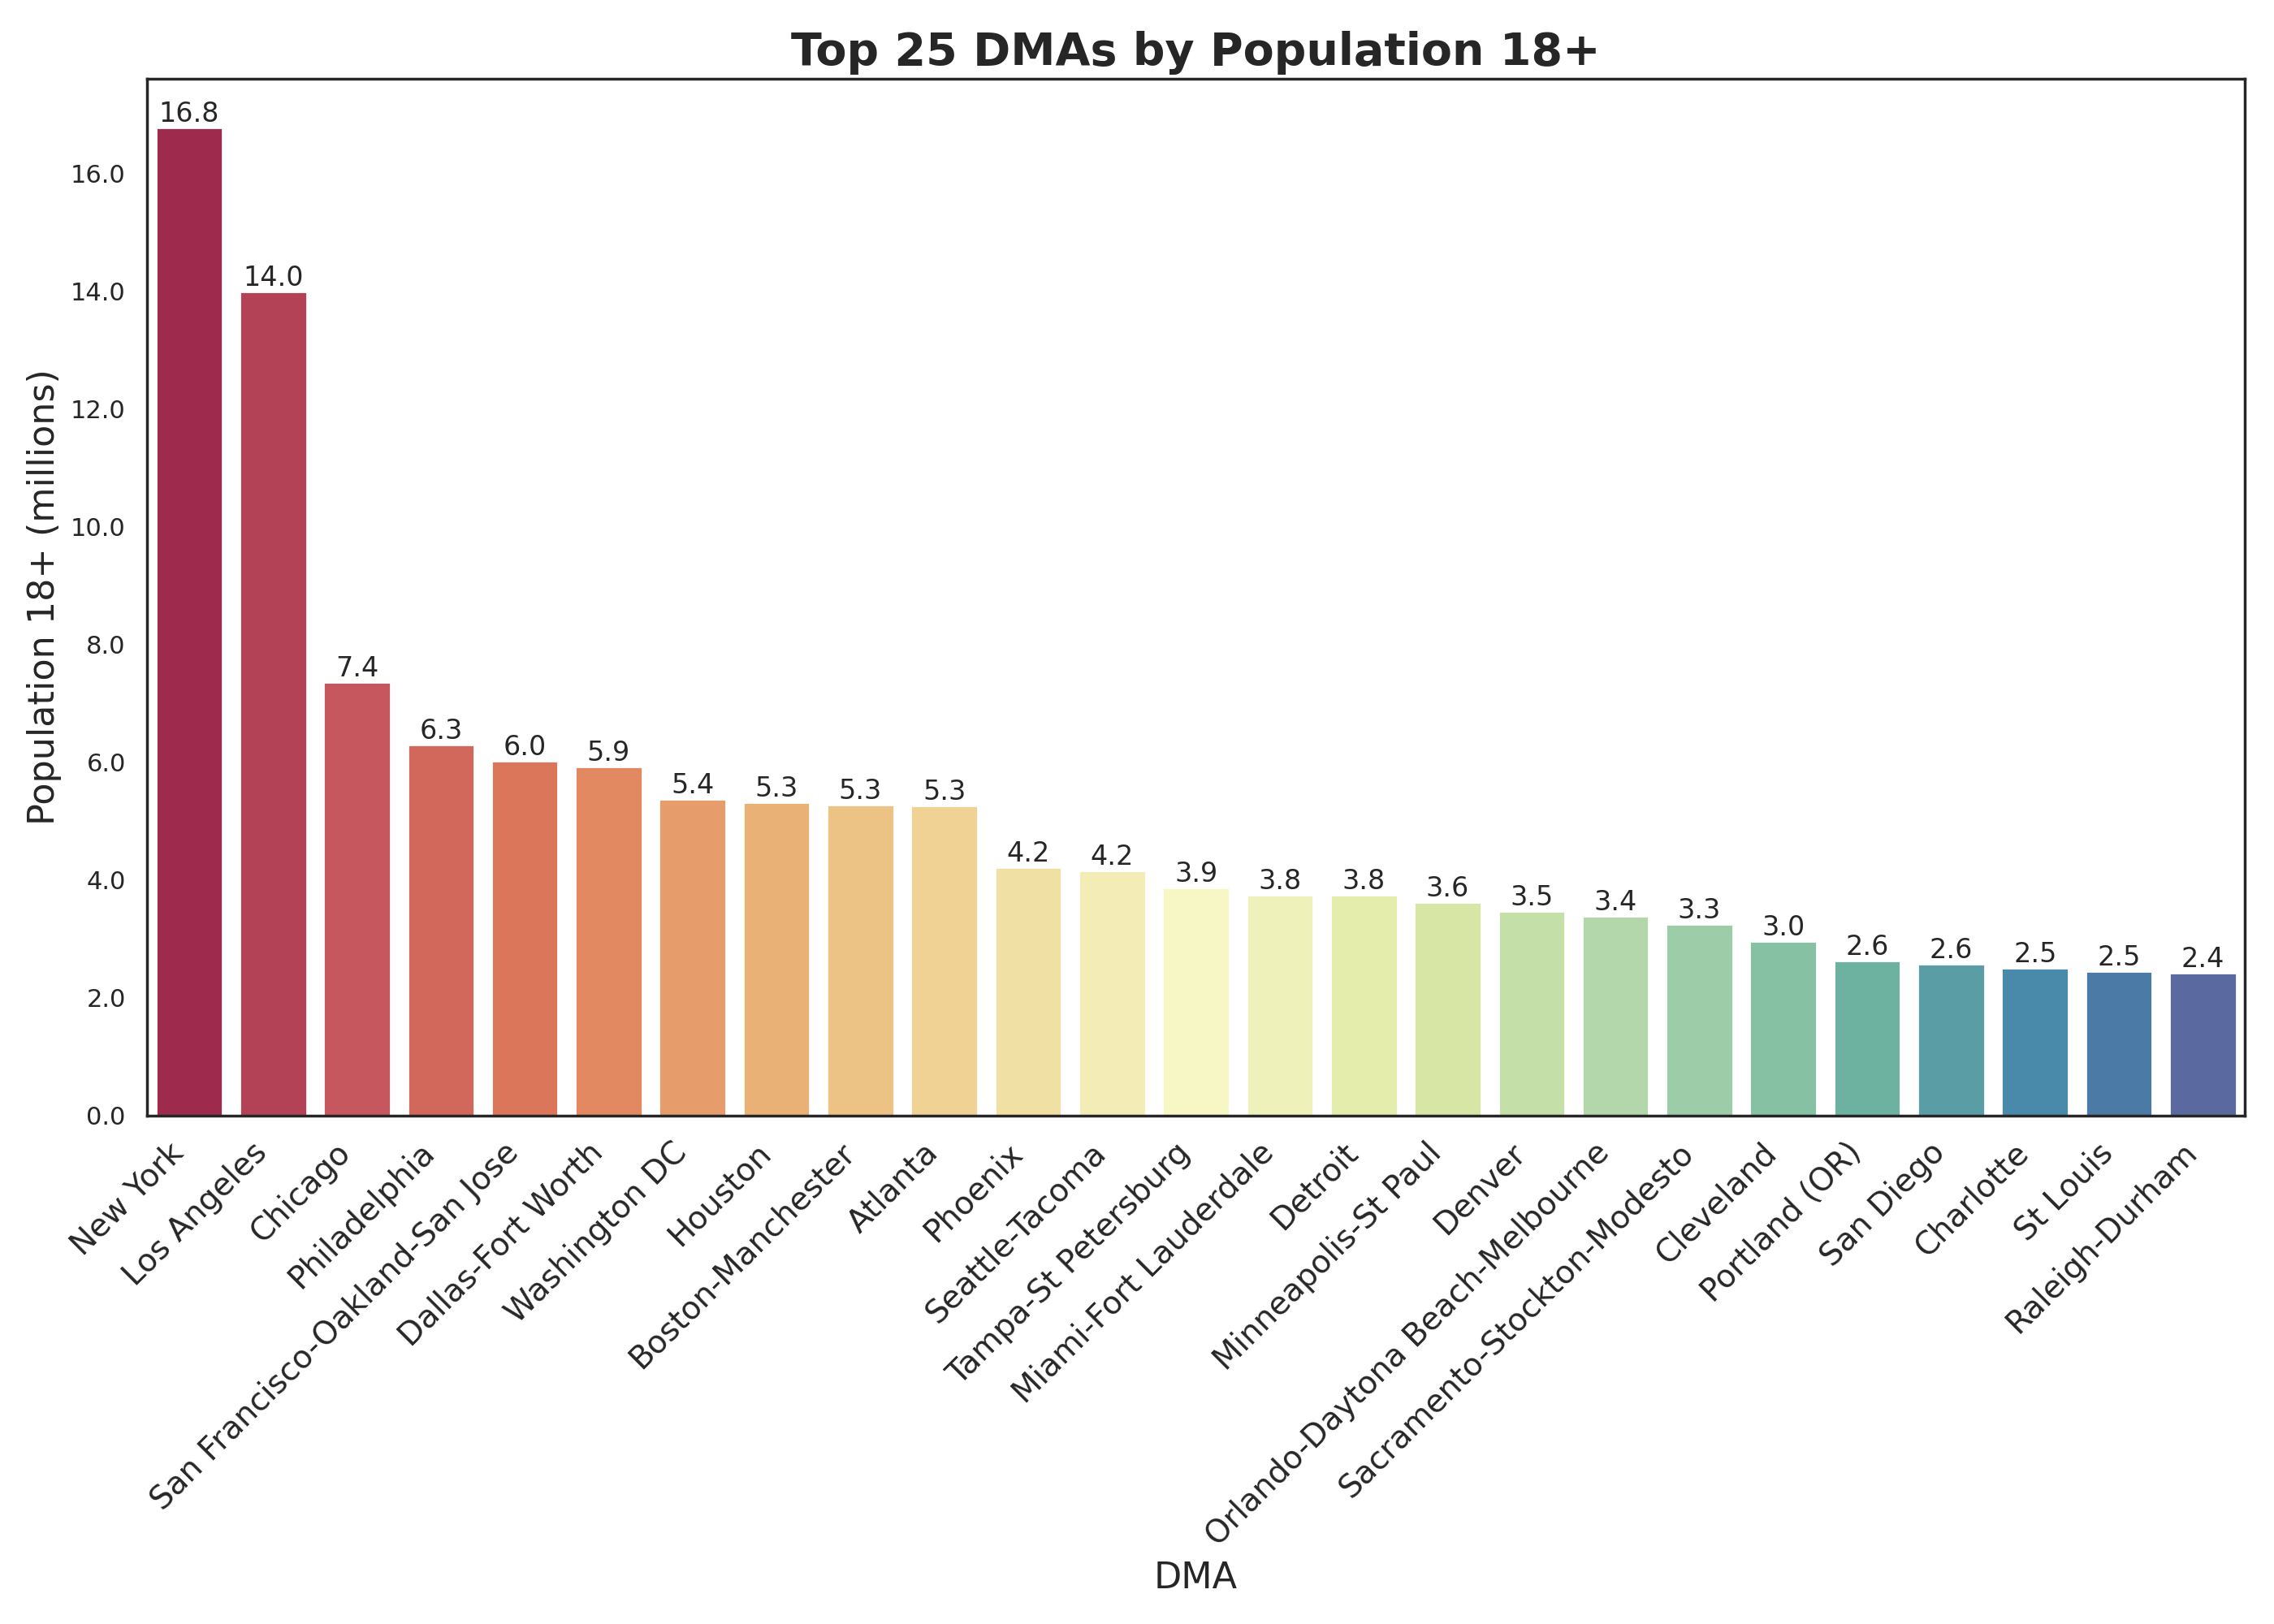

In [ ]:

# Load the dataset
file_path = 'Combined_Dataset_DMA.xlsx'  # Update this to your actual file path
data = pd.read_excel(file_path)

# Sort the data by population and select the top 25 DMAs
sorted_data = data.nlargest(25, 'Population 18+').sort_values('Population 18+', ascending=False)

# Convert population to millions for plotting
sorted_data['Population 18+ (millions)'] = sorted_data['Population 18+'] / 1_000_000

# Set the style of seaborn for a clean look without gridlines
sns.set_style("white")

# Create a vertical bar chart with seaborn
plt.figure(figsize=(14, 10))
barplot = sns.barplot(
    x='DMA Name',
    y='Population 18+ (millions)',
    data=sorted_data,
    palette='Spectral'
)

# Add title and labels with increased font size and bold the title
plt.title('Top 25 DMAs by Population 18+', fontsize=20, fontweight='bold')
plt.xlabel('DMA', fontsize=16)
plt.ylabel('Population 18+ (millions)', fontsize=16)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)

# Format y-axis labels to show values in millions without 'M' suffix
barplot.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: f"{x:,.1f}")
)

# Add labels to the bars
for patch in barplot.patches:
    height = patch.get_height()
    plt.text(
        patch.get_x() + patch.get_width() / 2,
        height,
        f'{height:.1f}',
        ha='center',
        va='bottom',
        fontsize=12
    )

# Remove the gridlines (if present, depending on the Seaborn style)
barplot.grid(False)

# Ensure that the plot is displayed properly with rotated x-axis labels
plt.tight_layout()

# Show the plot
plt.show()





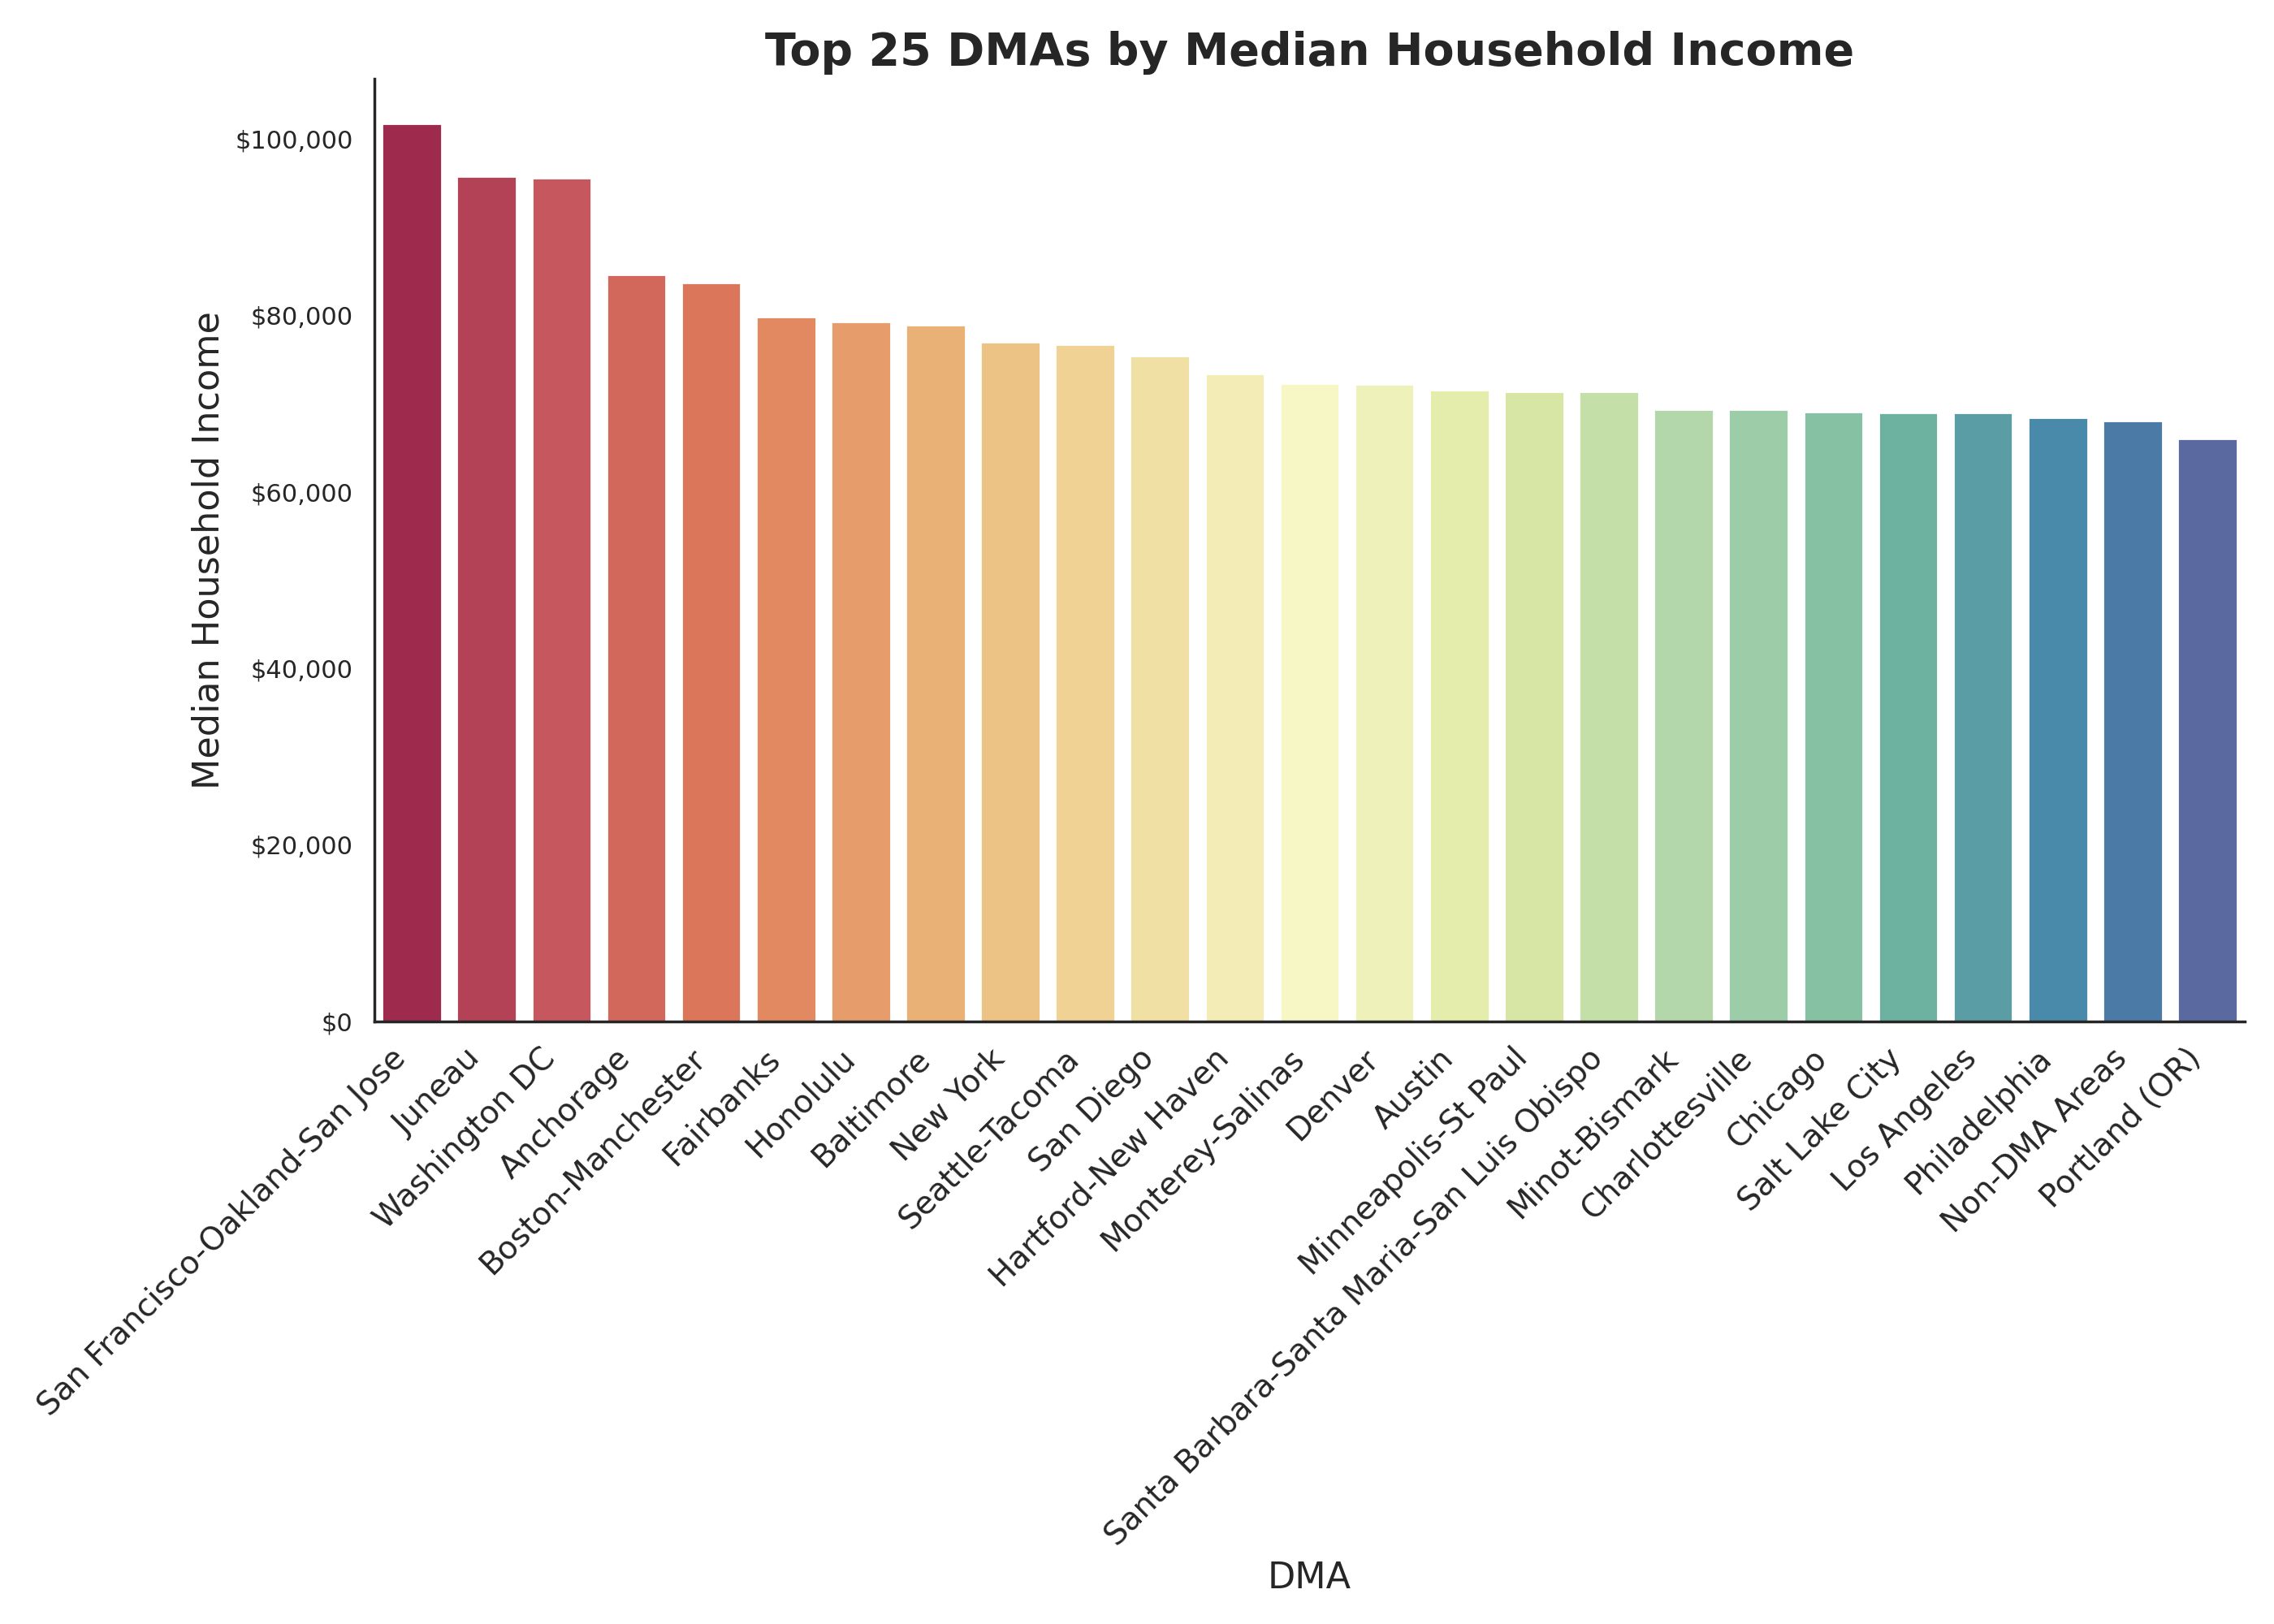

In [ ]:

# Find top DMAs based on Median Household Income
top_income_dmas = data.nlargest(25, 'Med HHld Income').sort_values('Med HHld Income', ascending=False)

# Create a vertical bar chart with seaborn
plt.figure(figsize=(14, 10))
barplot = sns.barplot(x='DMA Name', y='Med HHld Income', data=top_income_dmas, palette='Spectral')

# Add title and labels with increased font size and make the title bold
plt.title('Top 25 DMAs by Median Household Income', fontsize=20, fontweight='bold')
plt.xlabel('DMA', fontsize=16)
plt.ylabel('Median Household Income', fontsize=16)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)

# Format y-axis labels as currency
barplot.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: f"${x:,.0f}")
)

# Remove gridlines for a cleaner look
sns.despine()

plt.tight_layout()  # Adjust layout to fit the rotated x labels
plt.show()


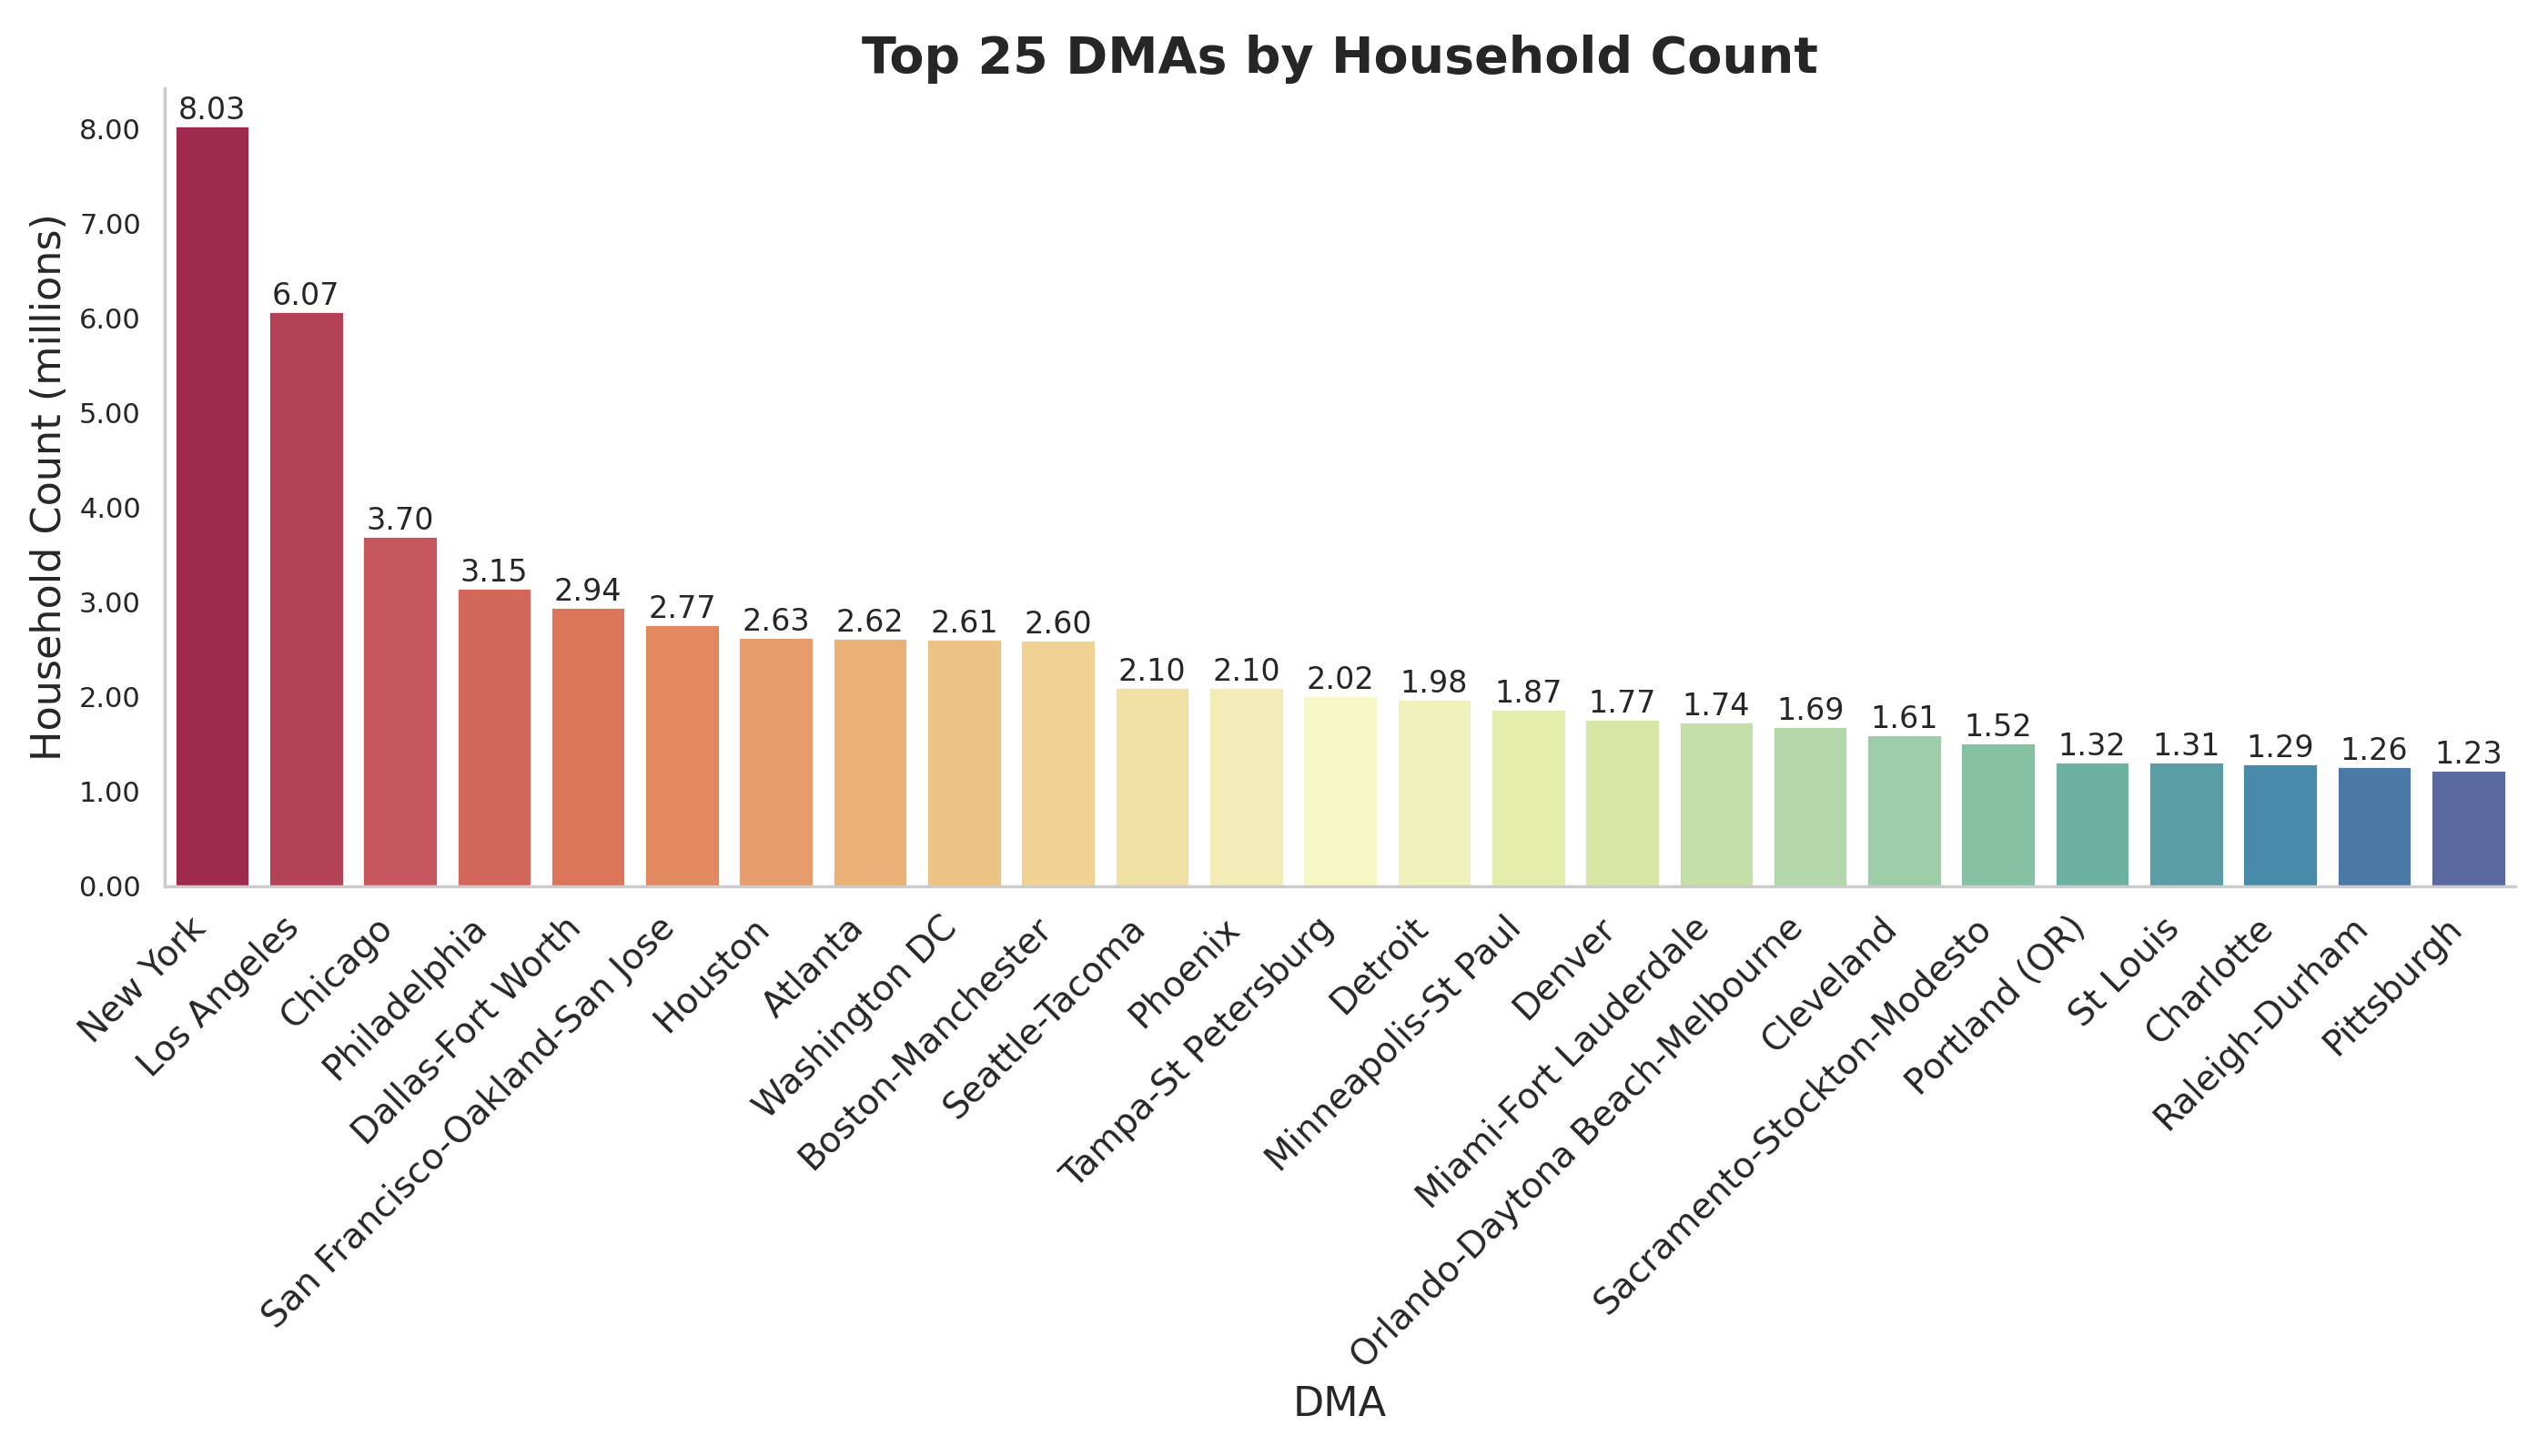

In [ ]:
# Find top DMAs based on Household Count
top_household_count_dmas = data.nlargest(25, 'Household Count').sort_values('Household Count', ascending=False)

# Convert 'Household Count' to millions
top_household_count_dmas['Household Count (millions)'] = top_household_count_dmas['Household Count'] / 1e6

# Create a vertical bar chart with seaborn
plt.figure(figsize=(14, 8))  # Adjusted for 25 DMAs
barplot = sns.barplot(x='DMA Name', y='Household Count (millions)', data=top_household_count_dmas, palette='Spectral')

# Add title and labels with increased font size and bold the title
plt.title('Top 25 DMAs by Household Count', fontsize=20, fontweight='bold')
plt.xlabel('DMA', fontsize=16)
plt.ylabel('Household Count (millions)', fontsize=16)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)

# Format y-axis labels to show values in millions
barplot.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: f"{x:,.2f}")
)

# Remove gridlines for a cleaner look
sns.despine()

# Add labels to the bars
for bar in barplot.patches:
    # Get the height of the bar (which is the value of the data point)
    height = bar.get_height()
    # Place the text at the top of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.2f}', ha='center', va='bottom')

# Remove the gridlines (if present, depending on the Seaborn style)
barplot.grid(False)

plt.tight_layout()  # Adjust layout to fit the rotated x labels
plt.show()



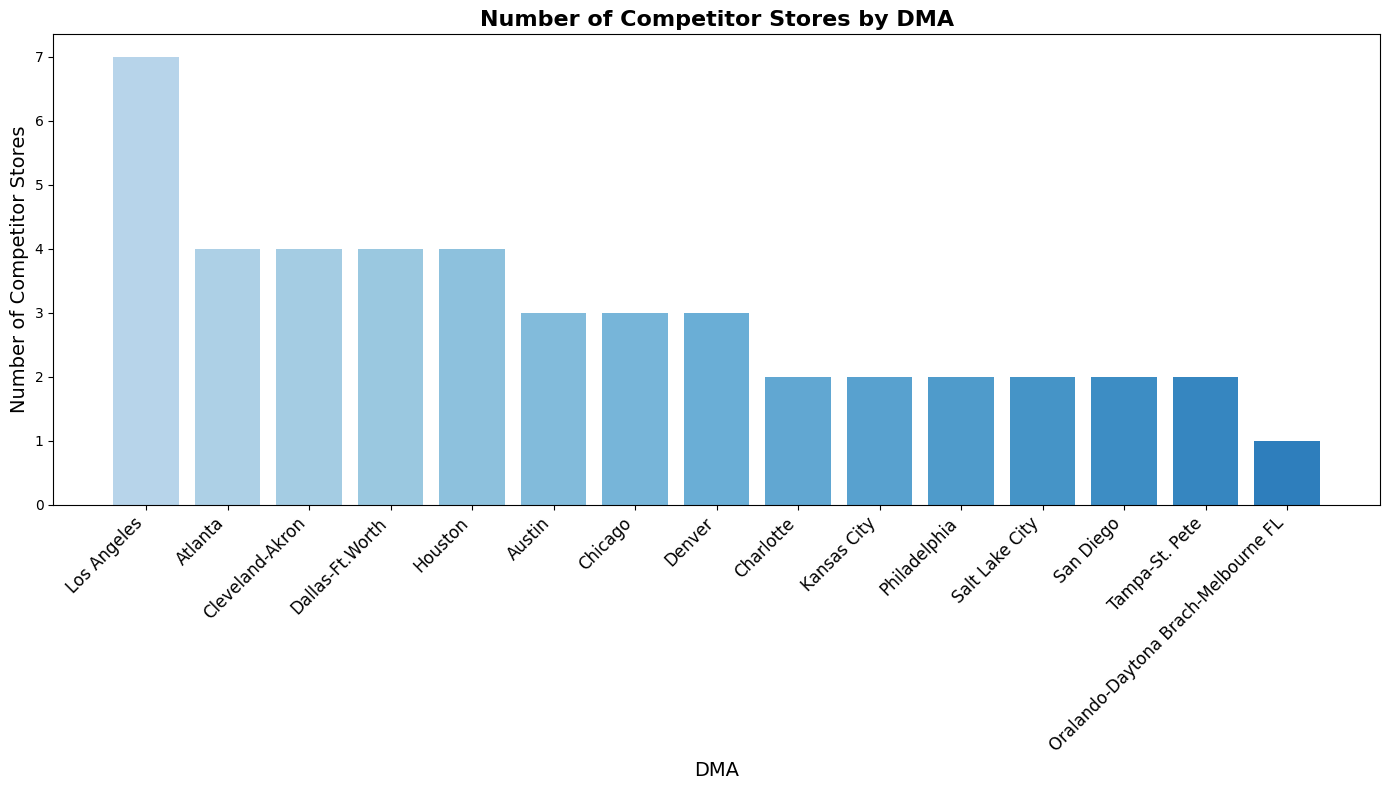

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # This is the missing import

# Load the data into a pandas DataFrame
file_path = 'stores data-set-withDMA.xlsx'
data = pd.read_excel(file_path)

# Group the data by the 'DMA ' column (with the trailing space) and count the unique number of stores in each DMA
market_saturation = data.groupby('DMA ')['Store'].nunique().reset_index()

# Rename the columns for clarity
market_saturation.columns = ['DMA', 'Number of Competitor Stores']

# Sort the DMAs by the number of stores to see which have fewer competitors
market_saturation_sorted = market_saturation.sort_values(by='Number of Competitor Stores', ascending=False)

# Set the size of the plot
plt.figure(figsize=(14, 8))

# Generate a color map with the 'Blues' color scheme
colors = plt.cm.Blues(np.linspace(0.3, 0.7, len(market_saturation_sorted)))

# Create a bar plot for the DMA and the number of competitor stores using the color map
plt.bar(market_saturation_sorted['DMA'], market_saturation_sorted['Number of Competitor Stores'], color=colors)

# Set the title and labels with increased font sizes
plt.title('Number of Competitor Stores by DMA', fontsize=16, fontweight='bold')
plt.xlabel('DMA', fontsize=14)
plt.ylabel('Number of Competitor Stores', fontsize=14)

# Slant x-axis labels at 45 degrees
plt.xticks(rotation=45, fontsize=12, ha='right')

# Adjust the subplot parameters to give the plot more room
plt.subplots_adjust(bottom=0.35)

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()






In [ ]:
import pandas as pd
from scipy.stats import zscore

# Load the datasets
combined_sales_stores_data_path = 'combined_sales_stores_data.csv'
features_data_csv_path = 'Features data set.csv'

combined_sales_stores_data = pd.read_csv(combined_sales_stores_data_path)
features_data_csv = pd.read_csv(features_data_csv_path)

# Convert 'Date' in both datasets to datetime format to ensure consistency
features_data_csv['Date'] = pd.to_datetime(features_data_csv['Date'], format='%d/%m/%Y')
combined_sales_stores_data['Date'] = pd.to_datetime(combined_sales_stores_data['Date'], format='%d/%m/%Y')


# Merge the datasets on 'Store' and 'Date'
combined_datasets_corrected = pd.merge(
    combined_sales_stores_data,
    features_data_csv,
    on=['Store', 'Date'],
    how='inner'
)

# Since 'IsHoliday_x' and 'IsHoliday_y' should be the same, we'll drop one and rename the other
combined_datasets_cleaned = combined_datasets_corrected.drop(columns=['IsHoliday_y'])
combined_datasets_cleaned.rename(columns={'IsHoliday_x': 'IsHoliday'}, inplace=True)

# Group by 'DMA ' and calculate the mean CPI and Unemployment for each DMA
economic_health = combined_datasets_cleaned.groupby('DMA ').agg({
    'CPI': 'mean',
    'Unemployment': 'mean'
}).reset_index()

# Normalize the economic indicators using z-scores
economic_health['CPI Z-Score'] = zscore(economic_health['CPI'])
economic_health['Unemployment Z-Score'] = zscore(economic_health['Unemployment'])

# Calculate the Economic Health Score
economic_health['Economic Health Score'] = economic_health['CPI Z-Score'] - economic_health['Unemployment Z-Score']

# Rank DMAs based on the Economic Health Score
economic_health['Economic Rank'] = economic_health['Economic Health Score'].rank(ascending=False)

# Sort DMAs based on the Economic Health Score
economic_health_sorted = economic_health.sort_values(by='Economic Health Score', ascending=False)

# Show the top 10 DMAs based on Economic Health Score
top_10_dmas = economic_health_sorted.head(10)


# Assuming 'economic_health_sorted' has already been created as per your previous code

# Reorder the DataFrame to put 'Economic Rank' first
columns_order = ['Economic Rank'] + [col for col in economic_health_sorted.columns if col != 'Economic Rank']
economic_health_sorted = economic_health_sorted[columns_order]

# Now 'Economic Rank' will be the first column, followed by the others
display(economic_health_sorted.head(10))




,Economic Rank,DMA,CPI,Unemployment,CPI Z-Score,Unemployment Z-Score,Economic Health Score
10,1.0,Oralando-Daytona Brach-Melbourne FL,217.564946,6.606213,1.583764,-1.093872,2.677636
13,2.0,San Diego,214.689467,7.649850,1.474123,-0.184912,1.659035
12,3.0,Salt Lake City,215.322846,7.715172,1.498274,-0.128019,1.626293
14,4.0,Tampa-St. Pete,198.004157,7.991073,0.837923,0.112278,0.725645
1,5.0,Austin,187.383561,7.653890,0.432966,-0.181394,0.614359
2,6.0,Charlotte,131.926488,5.663385,-1.681578,-1.915032,0.233454
6,7.0,Denver,181.741318,7.948460,0.217831,0.075164,0.142667
9,8.0,Los Angeles,164.658084,7.649800,-0.433543,-0.184956,-0.248587
11,9.0,Philadelphia,135.093191,6.403293,-1.560834,-1.270606,-0.290228
7,10.0,Houston,155.895119,7.401237,-0.767669,-0.401442,-0.366227


Here is the count of stores for each DMA:

Los Angeles: 7 stores
Dallas-Ft.Worth: 4 stores
Houston: 4 stores
Atlanta: 4 stores
Cleveland-Akron: 4 stores
Denver: 3 stores
Chicago: 3 stores
Austin: 3 stores
Philadelphia: 2 stores
Tampa-St. Pete: 2 stores
Charlotte: 2 stores
San Diego: 2 stores
Salt Lake City: 2 stores
Kansas City: 2 stores
Oralando-Daytona Beach-Melbourne FL: 1 store

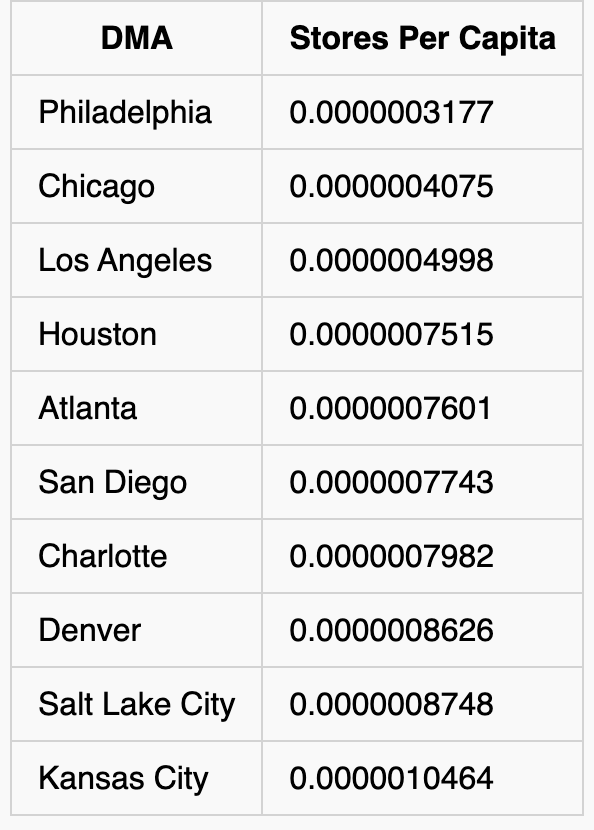

<ipython-input-59-1cbec95fafec>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales_stores_data['Date'] = pd.to_datetime(sales_stores_data['Date'], errors='coerce')
<ipython-input-59-1cbec95fafec>:23: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')  # This style has a white background


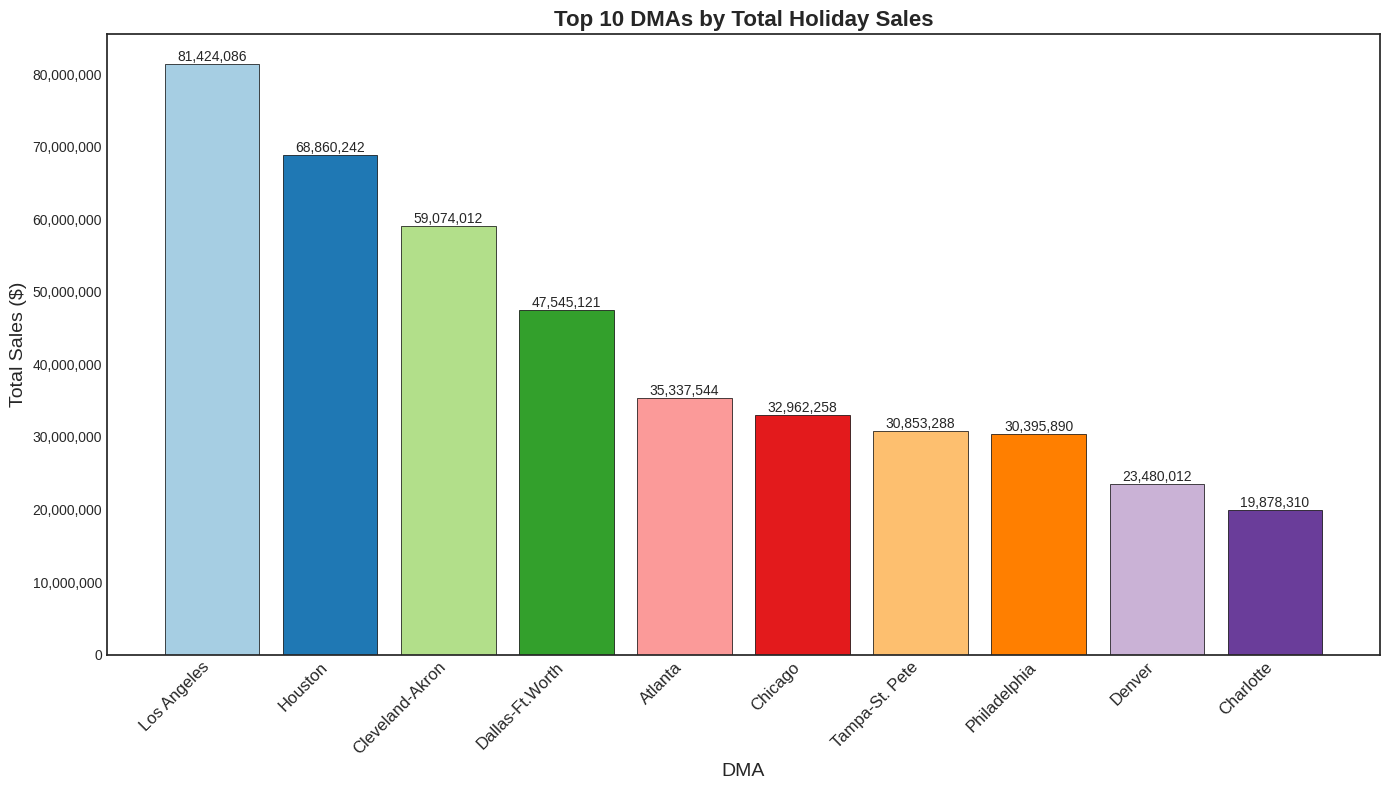

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the dataset
file_path = 'combined_sales_stores_data.csv'  # Make sure to update this path if needed
sales_stores_data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format and 'IsHoliday' to a boolean
sales_stores_data['Date'] = pd.to_datetime(sales_stores_data['Date'], errors='coerce')
sales_stores_data['IsHoliday'] = sales_stores_data['IsHoliday'].astype(bool)

# Filter out the holiday sales
holiday_sales = sales_stores_data[sales_stores_data['IsHoliday']]

# Group the holiday sales data by DMA and calculate total holiday sales for each DMA
top_dma_holiday_sales = holiday_sales.groupby('DMA')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

# Convert the series to a dataframe for better visualization and information
top_dma_holiday_sales = top_dma_holiday_sales.reset_index()

# Set the style for the plot
plt.style.use('seaborn-white')  # This style has a white background

# Create a bar plot for the top 10 DMAs
plt.figure(figsize=(14, 8))
bars = plt.bar(top_dma_holiday_sales['DMA'], top_dma_holiday_sales['Weekly_Sales'],
               color=plt.cm.Paired(range(len(top_dma_holiday_sales))),
               edgecolor='black')

# Add the data labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom')

# Set the title and labels with a larger font and bold title for readability
plt.title('Top 10 DMAs by Total Holiday Sales', fontsize=16, fontweight='bold')
plt.xlabel('DMA', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=14)

# Format the y-axis label as currency
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Remove gridlines
plt.grid(False)

# Tighten the layout to fit the labels
plt.tight_layout()

# Show the plot with a higher resolution
plt.show()




<ipython-input-66-c32e7a6009f3>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales_stores_data['Date'] = pd.to_datetime(sales_stores_data['Date'], errors='coerce')
<ipython-input-66-c32e7a6009f3>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')  # This style has a white background without gridlines


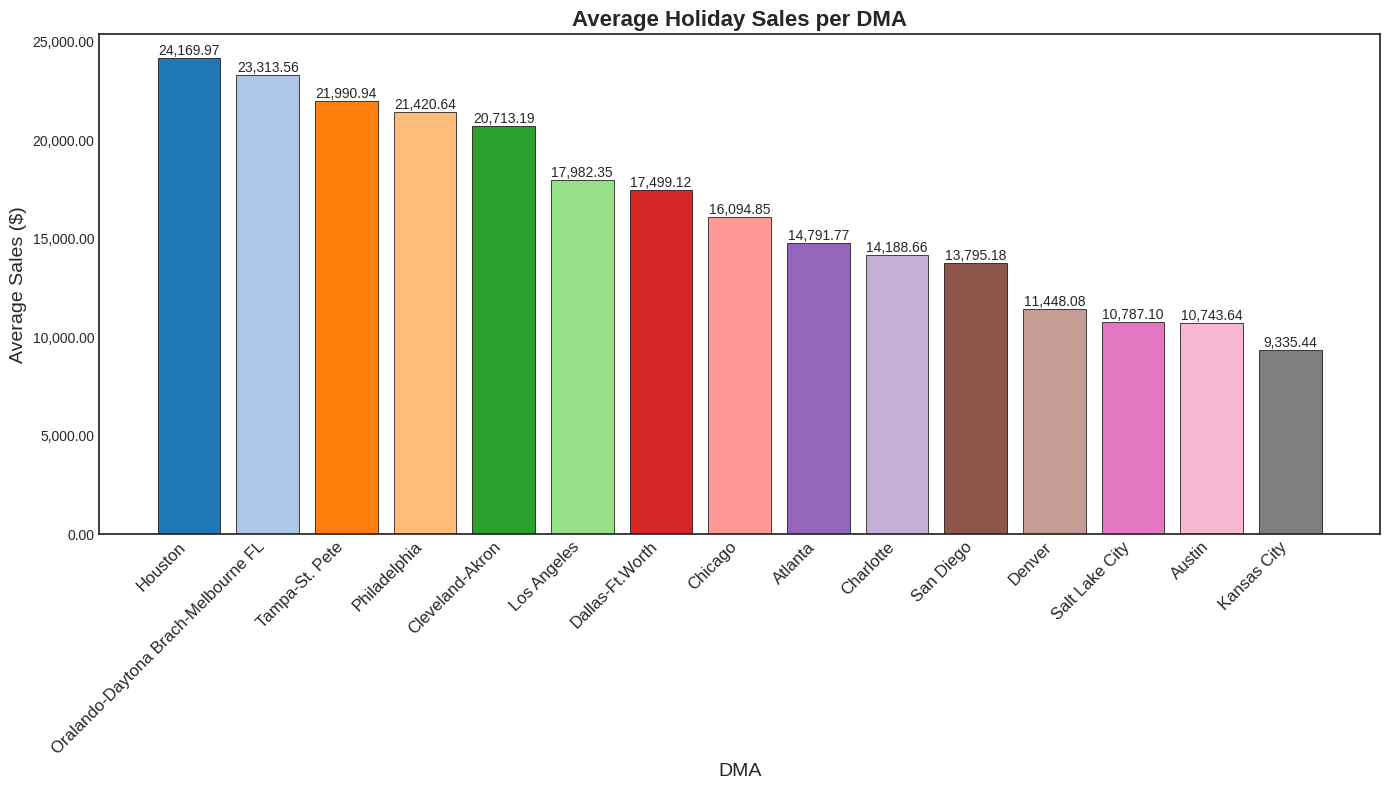

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the dataset
file_path = 'combined_sales_stores_data.csv'  # Make sure to update this path if needed
sales_stores_data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format and 'IsHoliday' to a boolean
sales_stores_data['Date'] = pd.to_datetime(sales_stores_data['Date'], errors='coerce')
sales_stores_data['IsHoliday'] = sales_stores_data['IsHoliday'].astype(bool)

# Filter out the holiday sales
holiday_sales = sales_stores_data[sales_stores_data['IsHoliday']]

# Calculate average holiday sales per DMA
avg_dma_holiday_sales = holiday_sales.groupby('DMA')['Weekly_Sales'].mean().sort_values(ascending=False).reset_index()

# Set the style for the plot
plt.style.use('seaborn-white')  # This style has a white background without gridlines

# Create a bar plot for average DMA holiday sales
plt.figure(figsize=(14, 8))
colors = plt.cm.tab20(range(len(avg_dma_holiday_sales)))
bars = plt.bar(avg_dma_holiday_sales['DMA'], avg_dma_holiday_sales['Weekly_Sales'], color=colors, edgecolor='black')

# Add the data labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.2f}', ha='center', va='bottom')

# Set the title and labels with a larger font and bold title for readability
plt.title('Average Holiday Sales per DMA', fontsize=16, fontweight='bold')
plt.xlabel('DMA', fontsize=14)
plt.ylabel('Average Sales ($)', fontsize=14)

# Format the y-axis label as currency
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Tighten the layout to fit the labels
plt.tight_layout()

# Show the plot with a higher resolution
plt.show()

